In [103]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('zippedData/im.db/im.db')
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-poster')
sns.set_palette('colorblind')

In [2]:
genres_df = pd.read_csv('zippedData/genres_breakdown.csv')

genres_df['Tickets']= genres_df['Tickets'].str.replace(',','')
genres_df['Tickets'] = [float(x) for x in genres_df['Tickets'].values]
# genres_df = int(genres_df['Tickets'])
genres_df['Avg_ticket_per_genre'] = genres_df['TotalBoxOffice']/genres_df['Tickets']


In [3]:
genres_df['Avg_movie_Total_boxoffice'] = genres_df['TotalBoxOffice']/genres_df['Movies']
genres_df.head()

,Genre,Movies,TotalBoxOffice,Tickets,Share,Avg_ticket_per_genre,Avg_movie_Total_boxoffice
0,Adventure,1138,6.554765e+10,9.329378e+09,26.84%,7.025940,5.759899e+07
1,Action,1141,5.284109e+10,7.293605e+09,21.64%,7.244852,4.631121e+07
2,Drama,5562,3.586833e+10,5.448416e+09,14.69%,6.583258,6.448818e+06
3,Comedy,2456,3.411547e+10,5.201029e+09,13.97%,6.559370,1.389066e+07
4,Thriller/Suspense,1249,2.008128e+10,2.919857e+09,8.22%,6.877487,1.607788e+07


In [4]:
# ax3 = genres_df['avg_ticket_per_genre'].plot(kind='line', figsize=(12, 6), rot=0)
# plt.legend(prop={'size': 12})
# plt.xlabel('Genre', fontsize=16)

# plt.xticks(fontsize=15, rotation=45)


Text(0.5, 1.0, 'Expected Box Office Gross per film')

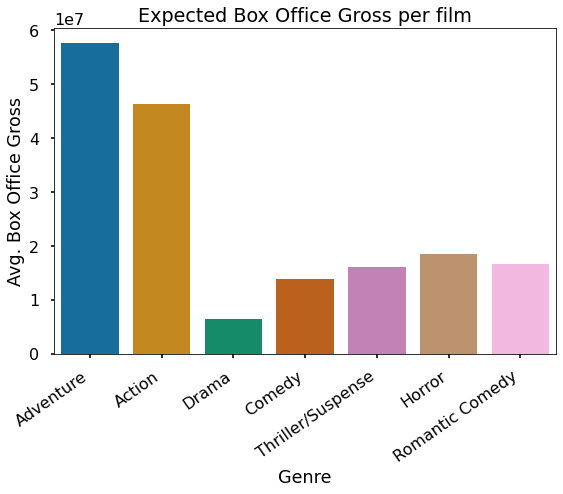

In [5]:
x = genres_df['Genre'].head(7)
y = genres_df['Avg_movie_Total_boxoffice'].head(7)
plt.figure(figsize=(9,6))
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=35, horizontalalignment='right')
plt.xlabel('Genre')
plt.ylabel('Avg. Box Office Gross')
plt.title('Expected Box Office Gross per film')

Text(0.5, 1.0, 'Total Movies By Genre')

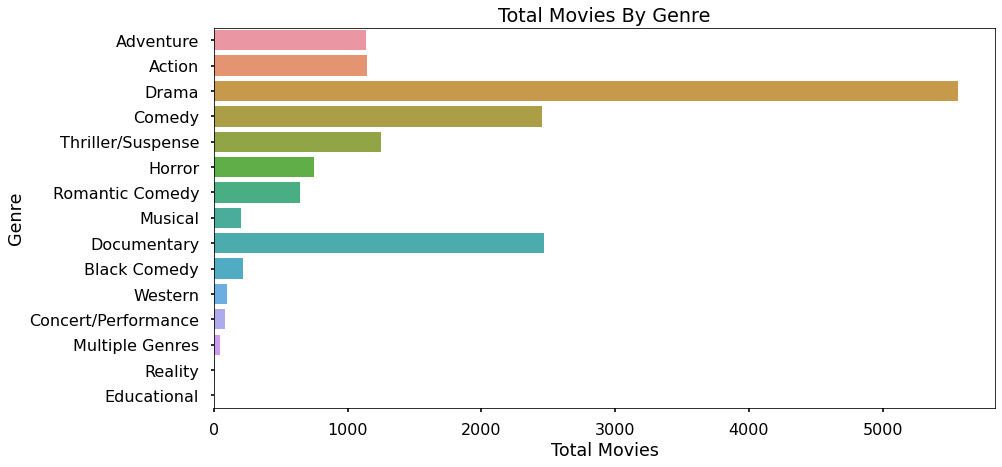

In [6]:
x = genres_df['Movies']
y = genres_df['Genre']

plt.figure(figsize=(14,7))
ax3 = sns.barplot(x=x, y=y,)
plt.xlabel('Total Movies')
plt.ylabel('Genre')
plt.title('Total Movies By Genre')

Text(0.5, 1.0, 'Top Grossing Genres')

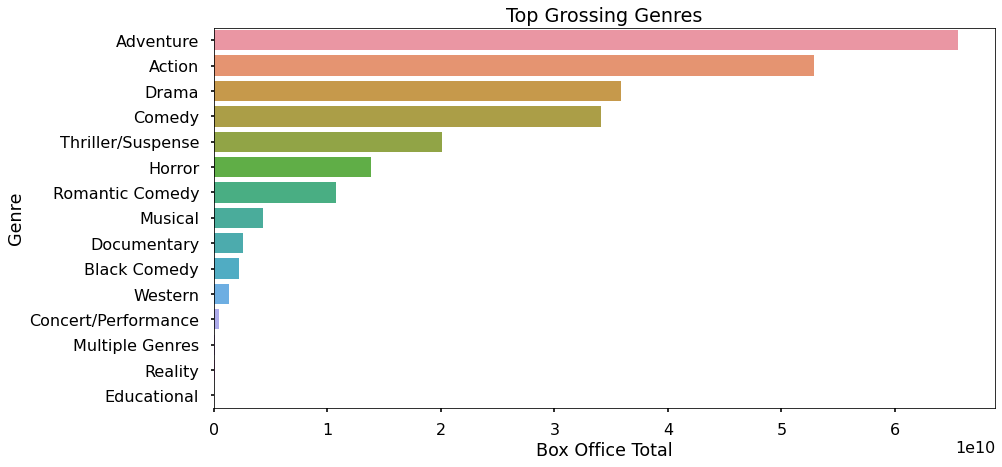

In [7]:
x = genres_df['TotalBoxOffice']
y = genres_df['Genre']

plt.figure(figsize=(14,7))
ax3 = sns.barplot(x=x, y=y,)
plt.xlabel('Box Office Total')
plt.ylabel('Genre')
plt.title('Top Grossing Genres')

In [ ]:
x = genres_df['TotalBoxOffice'].groupby(genres_df['Genre'])
y = genres_df['Total']

plt.figure(figsize=(14,7))
ax3 = sns.barplot(x=x, y=y,)
plt.xlabel('Total Movies')
plt.ylabel('Genre')
plt.title('Total Movies By Genre')

In [ ]:
movie_studio = pd.read_csv('zippedData/Distributors_movie_breakdown_95to22.csv')
# movie_studio = movie_studio.drop(['Unnamed: 5', 'Unnamed: 6', "Unnamed: 7", 'Unnamed: 8'], axis=1)
movie_studio['Share'] = list(map(lambda x: x[:-1], movie_studio['Share'].values))
movie_studio['Share'] = [float(x) for x in movie_studio['Share'].values]
movie_studio = movie_studio.head(6)
movie_studio.info()


In [ ]:
# declaring data
x = movie_studio['Share']
y = movie_studio['Movie Studio']
  
  
# plotting data on chart
plt.pie(x, labels=y, autopct='%.0f%%')
  
# displaying chart
plt.show()

In [73]:
stats_df = pd.read_csv('zippedData/rtmoviestats.csv')
stats_df = stats_df.drop(['rating', 'year', 'score', 'votes', 'writer', 'star', 'country'], axis = 1 )
stats_df.dropna()

,name,genre,released,director,budget,gross,company,runtime
0,The Shining,Drama,"June 13, 1980 (United States)",Stanley Kubrick,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,Adventure,"July 2, 1980 (United States)",Randal Kleiser,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,Action,"June 20, 1980 (United States)",Irvin Kershner,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,Comedy,"July 2, 1980 (United States)",Jim Abrahams,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,Comedy,"July 25, 1980 (United States)",Harold Ramis,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,Action,"January 17, 2020 (United States)",Adil El Arbi,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,Action,"February 14, 2020 (United States)",Jeff Fowler,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,Adventure,"January 17, 2020 (United States)",Stephen Gaghan,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,Adventure,"February 21, 2020 (United States)",Chris Sanders,135000000.0,111105497.0,20th Century Studios,100.0


In [78]:
#quantity of movies by studio ** Columbia = Sony 
stats_df['company'].value_counts().head(25)

Universal Pictures           260
Warner Bros.                 229
Columbia Pictures            228
Paramount Pictures           224
Twentieth Century Fox        171
New Line Cinema              121
Walt Disney Pictures          97
Touchstone Pictures           76
Dreamworks Pictures           62
Metro-Goldwyn-Mayer (MGM)     58
Fox 2000 Pictures             53
Screen Gems                   50
Summit Entertainment          49
TriStar Pictures              46
Fox Searchlight Pictures      45
Lionsgate                     44
Dimension Films               37
Miramax                       36
Focus Features                32
New Regency Productions       28
DreamWorks Animation          27
Orion Pictures                27
Revolution Studios            25
Castle Rock Entertainment     23
Hollywood Pictures            23
Name: company, dtype: int64

In [92]:
#Count of Universal movies by Genre
Universal_df = stats_df[stats_df['company'] == 'Universal Pictures']
Universal_df['genre'].value_counts()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Comedy'),
  Text(1, 0, 'Action'),
  Text(2, 0, 'Drama'),
  Text(3, 0, 'Biography'),
  Text(4, 0, 'Adventure'),
  Text(5, 0, 'Horror'),
  Text(6, 0, 'Crime'),
  Text(7, 0, 'Animation'),
  Text(8, 0, 'Fantasy'),
  Text(9, 0, 'Thriller'),
  Text(10, 0, 'Mystery'),
  Text(11, 0, 'Family'),
  Text(12, 0, 'Romance')])

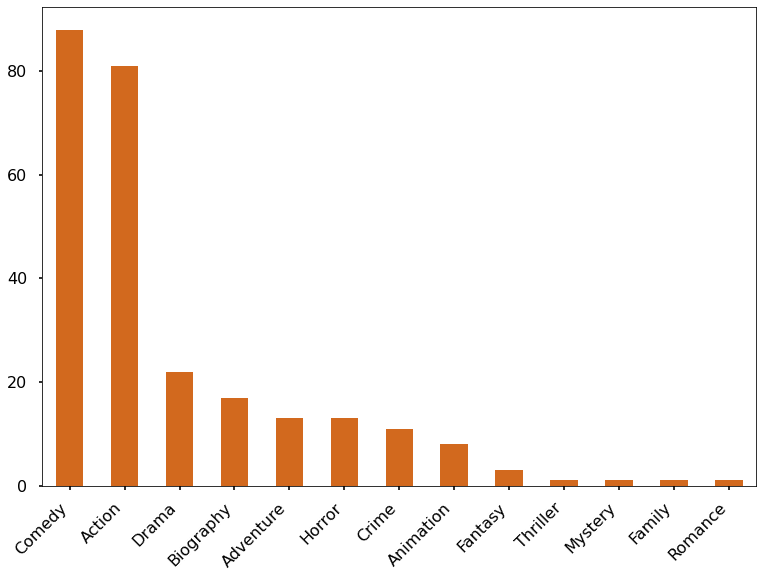

In [112]:
Universal_df['genre'].value_counts().plot(kind='bar', stacked=True, color='chocolate')
plt.title = ('Universal Movies by Genre')
plt.xticks(rotation=45, horizontalalignment='right')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Drama'),
  Text(3, 0, 'Crime'),
  Text(4, 0, 'Adventure'),
  Text(5, 0, 'Animation'),
  Text(6, 0, 'Biography'),
  Text(7, 0, 'Horror'),
  Text(8, 0, 'Fantasy'),
  Text(9, 0, 'Mystery')])

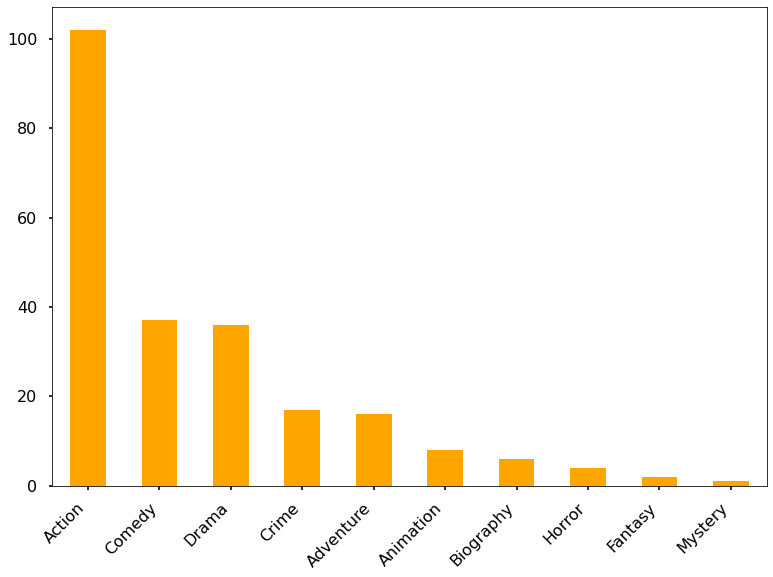

In [115]:
WB_df = stats_df[stats_df['company'] == 'Warner Bros.']
WB_df['genre'].value_counts().plot(kind='bar', stacked=True, color='orange')
plt.xticks(rotation=45, horizontalalignment='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Drama'),
  Text(3, 0, 'Animation'),
  Text(4, 0, 'Biography'),
  Text(5, 0, 'Crime'),
  Text(6, 0, 'Adventure'),
  Text(7, 0, 'Horror'),
  Text(8, 0, 'Mystery'),
  Text(9, 0, 'Fantasy'),
  Text(10, 0, 'Romance')])

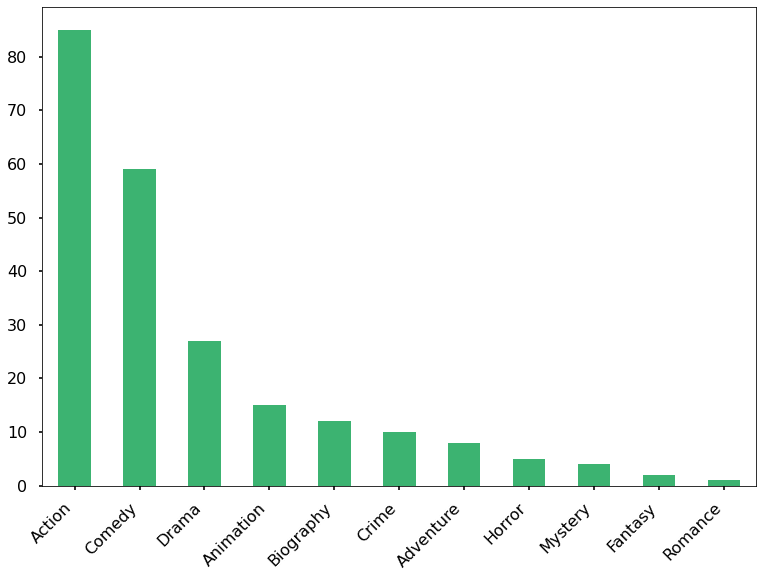

In [117]:
Sony_df = stats_df[stats_df['company'] == 'Columbia Pictures']
Sony_df['genre'].value_counts().plot(kind='bar', stacked=True, color='mediumseagreen')
plt.xticks(rotation=45, horizontalalignment='right')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Drama'),
  Text(3, 0, 'Crime'),
  Text(4, 0, 'Adventure'),
  Text(5, 0, 'Horror'),
  Text(6, 0, 'Animation'),
  Text(7, 0, 'Biography'),
  Text(8, 0, 'Fantasy'),
  Text(9, 0, 'Mystery')])

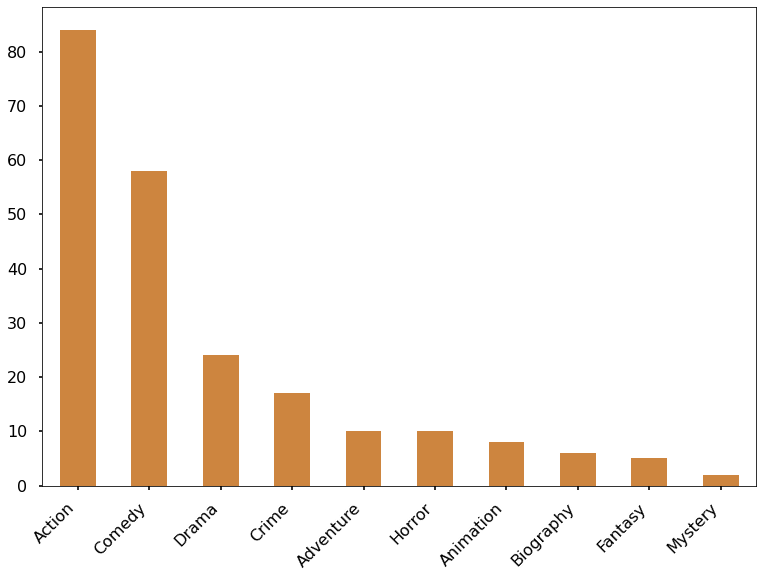

In [118]:
Paramount_df = stats_df[stats_df['company'] == 'Paramount Pictures']
Paramount_df['genre'].value_counts().plot(kind='bar', stacked=True, color='peru')
plt.xticks(rotation=45, horizontalalignment='right')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Drama'),
  Text(3, 0, 'Adventure'),
  Text(4, 0, 'Animation'),
  Text(5, 0, 'Crime'),
  Text(6, 0, 'Horror'),
  Text(7, 0, 'Biography')])

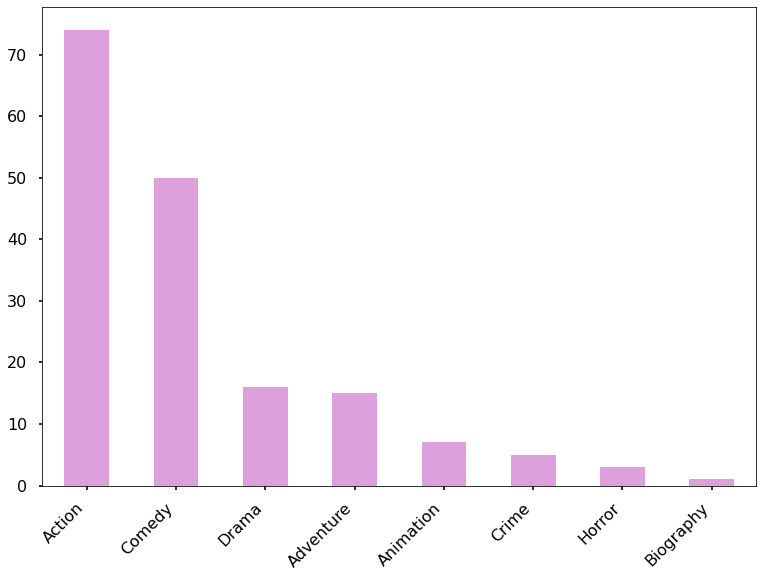

In [127]:
twentieth_df = stats_df[stats_df['company'] == 'Twentieth Century Fox']
twentieth_df['genre'].value_counts().plot(kind='bar', stacked=True, color='plum')
plt.xticks(rotation=45, horizontalalignment='right')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Animation'),
  Text(1, 0, 'Action'),
  Text(2, 0, 'Adventure'),
  Text(3, 0, 'Comedy'),
  Text(4, 0, 'Biography'),
  Text(5, 0, 'Drama')])

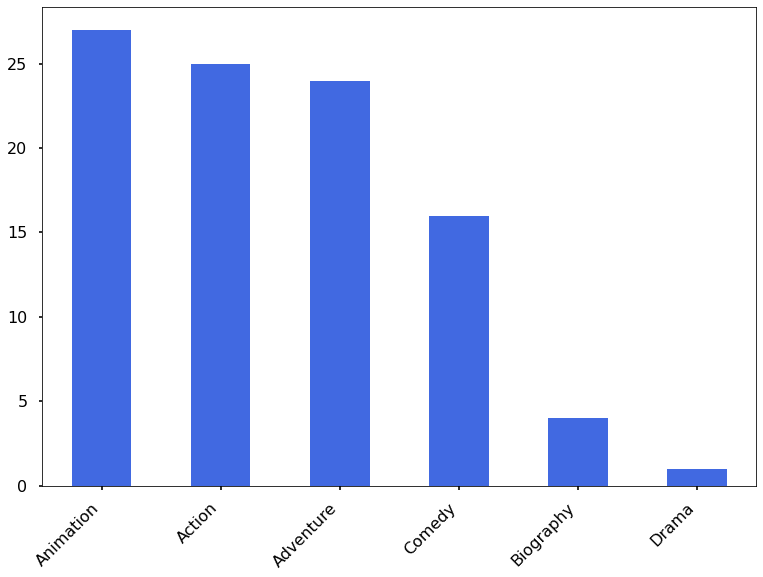

In [122]:
disney_df = stats_df[stats_df['company'] == 'Walt Disney Pictures']
disney_df['genre'].value_counts().plot(kind='bar', stacked=True, color='royalblue')
plt.xticks(rotation=45, horizontalalignment='right')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Drama'),
  Text(3, 0, 'Horror'),
  Text(4, 0, 'Crime'),
  Text(5, 0, 'Biography'),
  Text(6, 0, 'Animation')])

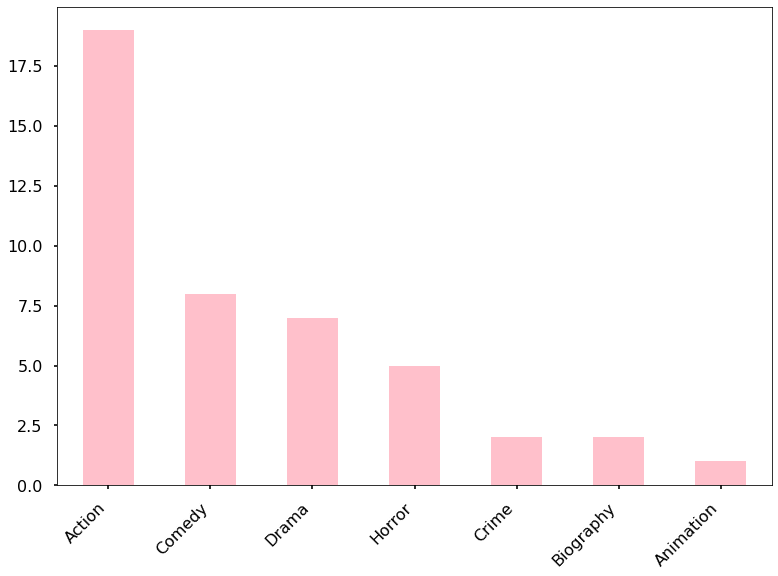

In [128]:
lionsgate_df = stats_df[stats_df['company'] == 'Lionsgate']
lionsgate_df['genre'].value_counts().plot(kind='bar', stacked=True, color='pink')
plt.xticks(rotation=45, horizontalalignment='right')

In [74]:
stats_df['profit']= stats_df['gross'] - stats_df['budget']
stats_df['ROI'] = stats_df['profit']/ stats_df['budget'] *100
stats_df['Margin'] = stats_df['profit']/stats_df['gross']*100
stats_df = stats_df[stats_df['Margin'] > 0].sort_values (by= 'Margin', ascending = False)

stats_df['genre'].value_counts()
# stats_df = stats_df[stats_df['genre'] != 'Family']
# stats_df.head()
# stats_df.dropna()

Action       1030
Comedy       1001
Drama         523
Animation     235
Crime         224
Adventure     215
Horror        201
Biography     201
Fantasy        30
Mystery        11
Thriller        6
Family          2
Romance         2
Sci-Fi          2
Western         1
Name: genre, dtype: int64

In [59]:
stats_df.groupby(['genre'])[['Margin']].agg('median').sort_values(by = 'Margin', ascending = False)

,Margin
genre,
Sci-Fi,78.567518
Horror,75.283357
Thriller,74.345154
Mystery,72.863482
Animation,71.429822
Drama,67.504520
Fantasy,65.421540
Comedy,64.338689
Adventure,63.968665


In [60]:
stats_df_mean = stats_df.groupby(['genre'])[['Margin']].agg('mean').sort_values(by = 'Margin', ascending = False)

Text(0, 0.5, 'Profit Margin (%)')

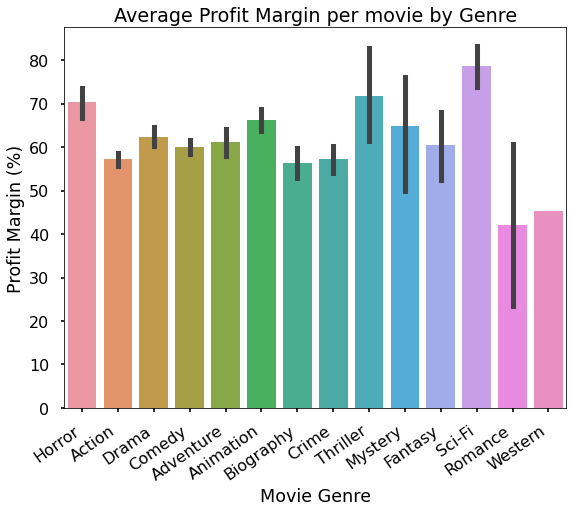

In [69]:
x = stats_df['genre']
y = stats_df['Margin']


plt.figure(figsize=(9,7))
sns.barplot(x = x, y = y)
plt.xticks(rotation=35, horizontalalignment='right')
plt.title('Average Profit Margin per movie by Genre')
plt.xlabel('Movie Genre')
plt.ylabel('Profit Margin (%)')